In [1]:
from f_drosophila_infer import *
from f_train import *
from f_data_prep import *

### fractional error = $\left[\dfrac{\displaystyle\sum_{cell, t} \left|g_{i, cell, t}^{pred} - g_{i, cell, t}^{data}\right|^{2}}{\displaystyle\sum_{cell, t} \left|g_{i, cell, t}^{data}\right|^{2}}\right]^{1/2}$

### data_all = data_all - median(data_all)
### 99 var vs. 27 var, np.tanh

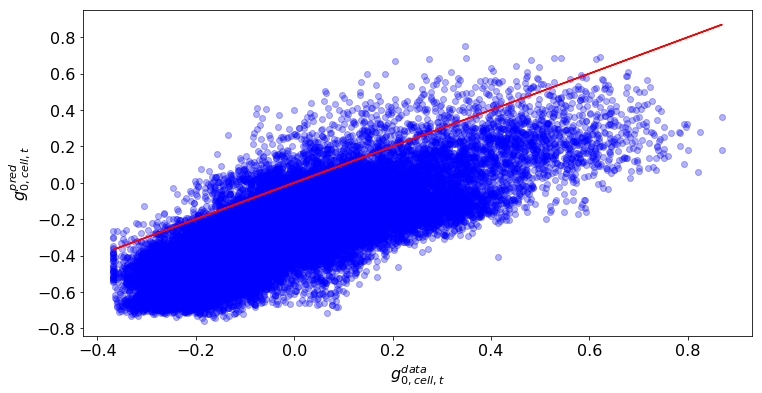

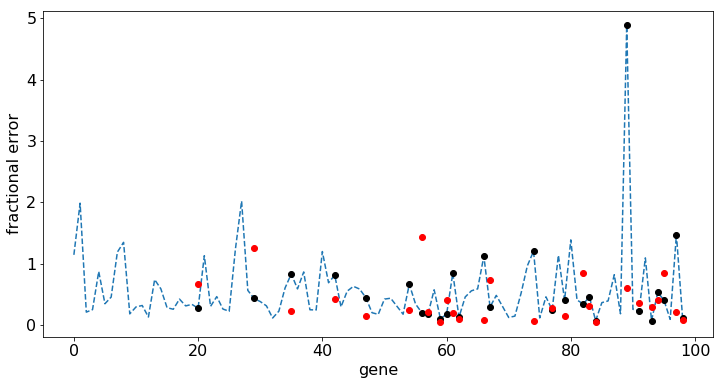

0.4014124501515364 0.4012132083741759 0.27395112514234715


In [2]:
np.random.seed(21)

data_all = np.loadtxt('../data_complete.txt')
data_all = data_all - np.median(data_all, axis=0)
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])
all_diff = make_data_diff(data_all, 6)

w, sigma, bias = infer_drosophila(all_init, all_diff, power=1, l=1)

all_actual = np.vstack([all_bin[i+1] for i in range(5)])
all_pred = all_init + np.tanh(bias + all_init.dot(w)) + sigma*npr.normal(size=(1,w.shape[0]))
# data_pred[data_pred < 0] = 0

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 16
plt.plot(all_actual[:,0], all_pred[:,0], 'bo', alpha=0.3)
plt.plot(all_actual[:,0], all_actual[:,0], 'r-')
plt.xlabel('$g_{0, cell, t}^{data}$')
plt.ylabel('$g_{0, cell, t}^{pred}$')
plt.show()

E = (np.sum(np.abs(all_pred - all_actual)**2, axis=0)/np.sum(np.abs(all_actual)**2, axis=0))**1/2

complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

data_comp = np.copy(data_all[:, comp_ind])
comp_bin = np.vsplit(data_comp, 6)
comp_init = np.vstack([comp_bin[i] for i in range(5)])
comp_diff = make_data_diff(data_comp, 6)

w, sigma, bias = infer_drosophila(comp_init, comp_diff, power=1, l=1)

comp_actual = np.vstack([comp_bin[i+1] for i in range(5)])
comp_pred = comp_init + np.tanh(bias + comp_init.dot(w)) + sigma*npr.normal(size=(1,w.shape[0]))

comp_E = (np.sum(np.abs(comp_pred - comp_actual)**2, axis=0)/np.sum(np.abs(comp_actual)**2, axis=0))**1/2

plt.figure(figsize=(12,6))
plt.plot(range(99), E, '--')
plt.plot(comp_ind, E[comp_ind], 'ko')
plt.plot(comp_ind, comp_E, 'ro')
plt.xlabel('gene')
plt.ylabel('fractional error')
plt.show()

print(np.median(E), np.median(E[comp_ind]), np.median(comp_E))

### 99 var vs. 27 var, cubic root

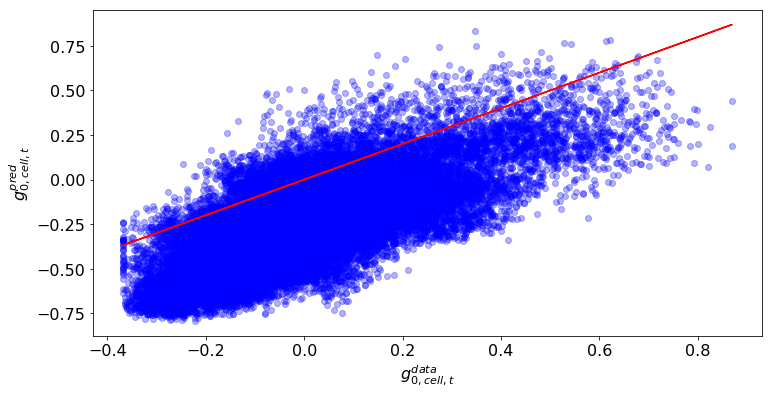

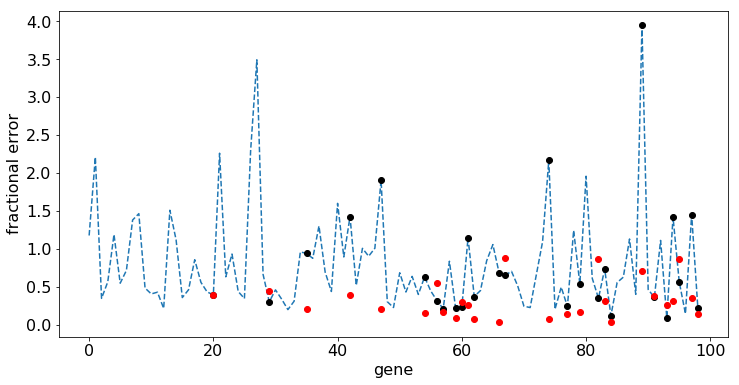

0.6180061984621154 0.5467889169868658 0.26778593282252555


In [3]:
np.random.seed(21)

w, sigma, bias = infer_drosophila(all_init, all_diff, power=3, l=1)

all_actual = np.vstack([all_bin[i+1] for i in range(5)])
# data_pred = data_init + np.tanh(bias + data_init.dot(w)) + sigma*npr.normal(size=(1,99))
all_pred = all_init + odd_power(bias + all_init.dot(w), 3) + sigma*npr.normal(size=(1,w.shape[0]))
# data_pred[data_pred < 0] = 0

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 16
plt.plot(all_actual[:,0], all_pred[:,0], 'bo', alpha=0.3)
plt.plot(all_actual[:,0], all_actual[:,0], 'r-')
plt.xlabel('$g_{0, cell, t}^{data}$')
plt.ylabel('$g_{0, cell, t}^{pred}$')
plt.show()

E = (np.sum(np.abs(all_pred - all_actual)**2, axis=0)/np.sum(np.abs(all_actual)**2, axis=0))**1/2

w, sigma, bias = infer_drosophila(comp_init, comp_diff, power=3, l=1)

comp_actual = np.vstack([comp_bin[i+1] for i in range(5)])
comp_pred = comp_init + odd_power(bias + comp_init.dot(w), 3) + sigma*npr.normal(size=(1,w.shape[0]))

comp_E = (np.sum(np.abs(comp_pred - comp_actual)**2, axis=0)/np.sum(np.abs(comp_actual)**2, axis=0))**1/2

plt.figure(figsize=(12,6))
plt.plot(range(99), E, '--')
plt.plot(comp_ind, E[comp_ind], 'ko')
plt.plot(comp_ind, comp_E, 'ro')
plt.xlabel('gene')
plt.ylabel('fractional error')
plt.show()

print(np.median(E), np.median(E[comp_ind]), np.median(comp_E))

### data_all = data_all - median(data_all)
### 99 var vs. 27 var, np.tanh

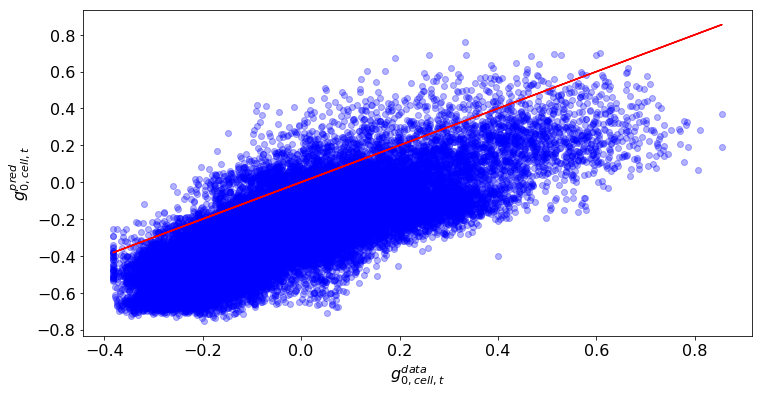

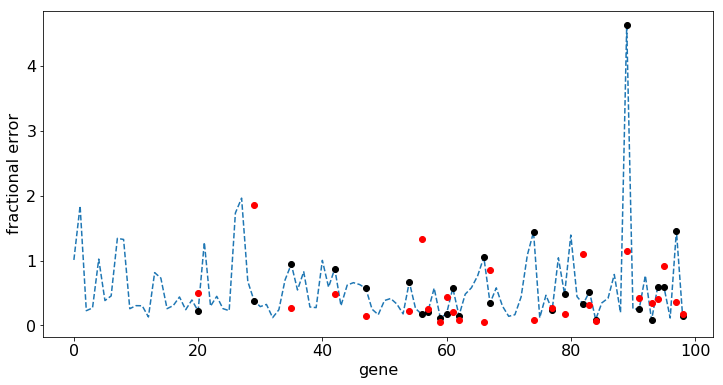

0.4163398121334713 0.38475287462160407 0.3170538671906009


In [4]:
np.random.seed(21)

data_all = np.loadtxt('../data_complete.txt')
data_all = data_all - np.mean(data_all, axis=0)
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])
all_diff = make_data_diff(data_all, 6)

w, sigma, bias = infer_drosophila(all_init, all_diff, power=1, l=1)

all_actual = np.vstack([all_bin[i+1] for i in range(5)])
all_pred = all_init + np.tanh(bias + all_init.dot(w)) + sigma*npr.normal(size=(1,w.shape[0]))
# data_pred[data_pred < 0] = 0

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 16
plt.plot(all_actual[:,0], all_pred[:,0], 'bo', alpha=0.3)
plt.plot(all_actual[:,0], all_actual[:,0], 'r-')
plt.xlabel('$g_{0, cell, t}^{data}$')
plt.ylabel('$g_{0, cell, t}^{pred}$')
plt.show()

E = (np.sum(np.abs(all_pred - all_actual)**2, axis=0)/np.sum(np.abs(all_actual)**2, axis=0))**1/2

complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

data_comp = np.copy(data_all[:, comp_ind])
comp_bin = np.vsplit(data_comp, 6)
comp_init = np.vstack([comp_bin[i] for i in range(5)])
comp_diff = make_data_diff(data_comp, 6)

w, sigma, bias = infer_drosophila(comp_init, comp_diff, power=1, l=1)

comp_actual = np.vstack([comp_bin[i+1] for i in range(5)])
comp_pred = comp_init + np.tanh(bias + comp_init.dot(w)) + sigma*npr.normal(size=(1,w.shape[0]))

comp_E = (np.sum(np.abs(comp_pred - comp_actual)**2, axis=0)/np.sum(np.abs(comp_actual)**2, axis=0))**1/2

plt.figure(figsize=(12,6))
plt.plot(range(99), E, '--')
plt.plot(comp_ind, E[comp_ind], 'ko')
plt.plot(comp_ind, comp_E, 'ro')
plt.xlabel('gene')
plt.ylabel('fractional error')
plt.show()

print(np.median(E), np.median(E[comp_ind]), np.median(comp_E))

### 99 var vs. 27 var, cubic root

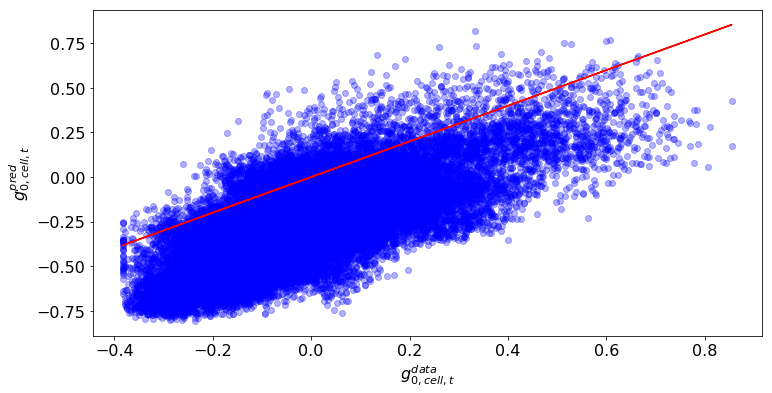

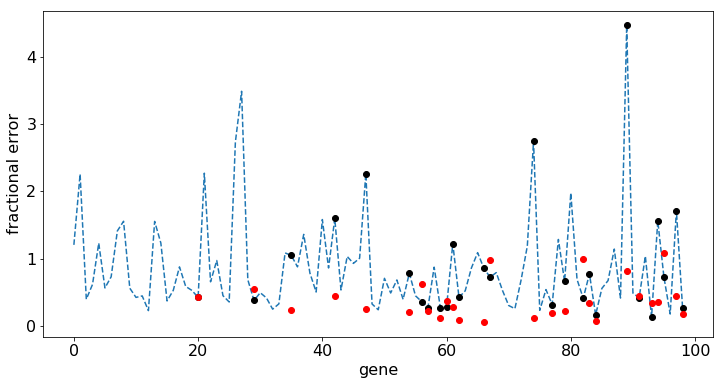

0.6718304615999929 0.6587257842548571 0.335831378582638


In [5]:
np.random.seed(21)

w, sigma, bias = infer_drosophila(all_init, all_diff, power=3, l=1)

all_actual = np.vstack([all_bin[i+1] for i in range(5)])
# data_pred = data_init + np.tanh(bias + data_init.dot(w)) + sigma*npr.normal(size=(1,99))
all_pred = all_init + odd_power(bias + all_init.dot(w), 3) + sigma*npr.normal(size=(1,w.shape[0]))
# data_pred[data_pred < 0] = 0

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 16
plt.plot(all_actual[:,0], all_pred[:,0], 'bo', alpha=0.3)
plt.plot(all_actual[:,0], all_actual[:,0], 'r-')
plt.xlabel('$g_{0, cell, t}^{data}$')
plt.ylabel('$g_{0, cell, t}^{pred}$')
plt.show()

E = (np.sum(np.abs(all_pred - all_actual)**2, axis=0)/np.sum(np.abs(all_actual)**2, axis=0))**1/2

w, sigma, bias = infer_drosophila(comp_init, comp_diff, power=3, l=1)

comp_actual = np.vstack([comp_bin[i+1] for i in range(5)])
comp_pred = comp_init + odd_power(bias + comp_init.dot(w), 3) + sigma*npr.normal(size=(1,w.shape[0]))

comp_E = (np.sum(np.abs(comp_pred - comp_actual)**2, axis=0)/np.sum(np.abs(comp_actual)**2, axis=0))**1/2

plt.figure(figsize=(12,6))
plt.plot(range(99), E, '--')
plt.plot(comp_ind, E[comp_ind], 'ko')
plt.plot(comp_ind, comp_E, 'ro')
plt.xlabel('gene')
plt.ylabel('fractional error')
plt.show()

print(np.median(E), np.median(E[comp_ind]), np.median(comp_E))

In [6]:
# data_complete = np.loadtxt('../data_complete.txt')
# data_complete = data_complete - np.median(data_complete, axis=0)
# data_bin = np.vsplit(data_complete, 6)
# data_init = np.vstack([data_bin[i] for i in range(5)])
# data_diff = make_data_diff(data_complete, 6)

In [7]:
# w, sigma, bias = infer_drosophila(data_init, data_diff, power=3)

In [8]:
# np.random.seed(21)
# data_actual = np.vstack([data_bin[i+1] for i in range(5)])
# # data_pred = data_init + np.tanh(bias + data_init.dot(w)) + sigma*npr.normal(size=(1,99))
# data_pred = data_init + odd_power(bias + data_init.dot(w), 3) + sigma*npr.normal(size=(1,99))
# # data_pred[data_pred < 0] = 0

# plt.figure(figsize=(12,6))
# plt.rcParams['font.size'] = 16
# plt.plot(data_actual[:,0], data_pred[:,0], 'bo', alpha=0.3)
# plt.plot(data_actual[:,0], data_actual[:,0], 'r-')
# plt.xlabel('$g_{0, cell, t}^{data}$')
# plt.ylabel('$g_{0, cell, t}^{pred}$')
# plt.show()

### $\displaystyle\sum_{cell, t} \left|\dfrac{g_{i, cell, t}^{pred} - g_{i, cell, t}^{data}}{g_{i, cell, t}^{data}}\right|^{2}$, for $g_{i, cell, t}^{data} \neq 0$

In [9]:
# E_v = []
# for i in range(99):
#     N = np.where(data_actual[:,i] != 0)
#     E = np.abs((data_pred[N[0],i] - data_actual[N[0],i])/data_actual[N[0],i])
# #     print(E.max(), data_actual[N[0],i][np.argmax(E)])
#     E_v.append(np.sum(E)/len(N[0]))
    
# plt.figure(figsize=(12,6))
# plt.plot(range(99), E_v, 'o--')
# plt.xlabel('gene')
# plt.show()

### infer 27 x 27 network using only 27 genes with complete measurements in all cells, at all time points

In [10]:
# complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
# comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

# gene_complete27 = data_complete[:, comp_ind]
# comp_bin = np.vsplit(gene_complete27, 6)
# comp_init = np.vstack([comp_bin[i] for i in range(5)])
# comp_diff = make_data_diff(gene_complete27, 6)

# w, sigma, bias = infer_drosophila(comp_init, comp_diff, power=3)

In [11]:
# comp_actual = np.vstack([comp_bin[i+1] for i in range(5)])
# # data_pred = data_init + np.tanh(bias + data_init.dot(w)) + sigma*npr.normal(size=(1,99))
# comp_pred = comp_init + odd_power(bias + comp_init.dot(w), 3) + sigma*npr.normal(size=(1,27))

# comp_E = (np.sum(np.abs(comp_pred - comp_actual)**2, axis=0)/np.sum(np.abs(comp_actual)**2, axis=0))**1/2

### $\left[\dfrac{\displaystyle\sum_{cell, t} \left|g_{i, cell, t}^{pred} - g_{i, cell, t}^{data}\right|^{2}}{\displaystyle\sum_{cell, t} \left|g_{i, cell, t}^{data}\right|^{2}}\right]^{1/2}$

In [12]:
# E = (np.sum(np.abs(data_pred - data_actual)**2, axis=0)/np.sum(np.abs(data_actual)**2, axis=0))**1/2
# # E = (np.sum(np.abs(data_pred - data_actual)**2, axis=0))**1/2

# complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
# comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

# plt.figure(figsize=(12,6))
# plt.plot(range(99), E, '--')
# plt.plot(comp_ind, E[comp_ind], 'ko')
# plt.plot(comp_ind, comp_E, 'ro')
# plt.xlabel('gene')
# plt.ylabel('fractional error')
# plt.show()

# # plt.figure(figsize=(12,6))
# # plt.scatter(np.mean(data_actual, axis=0), E/data_pred.shape[0])
# # plt.scatter(np.mean(data_actual, axis=0)[comp_ind], E[comp_ind]/data_pred.shape[0])
# # plt.show()

# print(np.mean(E[comp_ind]))
# print(np.mean(comp_E))

### $E = \left[\dfrac{\left|g^{pred}_{i, cell, t} - g^{actual}_{i, cell, t}\right|^{2}}{\left|g^{actual}_{i, cell, t}\right|^{2}}\right]^{1/2}$, $g_{i, cell, t} \neq 0$

In [13]:
# E_v = []
# N = np.where(data_actual.flatten() != 0)[0]
# # E = (np.abs(data_pred.flatten()[N] - data_actual.flatten()[N])**2/np.abs(data_actual.flatten()[N])**2)**(1/2)
# E = (np.abs(data_pred.flatten()[N] - data_actual.flatten()[N])**2/np.abs(data_actual.flatten()[N])**2)**(1/2)
# mean = np.mean(E)
# median = np.median(E)
# me = mean
# less_ind = np.where(E < me)[0]
# more_ind = np.where(E > me)[0]
# print(len(less_ind), len(more_ind))
# plt.figure(figsize=(12,6))
# plt.hist(np.abs(data_actual.flatten()[N][less_ind]), bins=500)
# plt.hist(np.abs(data_actual.flatten()[N][more_ind]), bins=500)

# plt.figure(figsize=(12,6))
# plt.hist(np.abs(data_actual.flatten()[N][less_ind]), bins=500)
# plt.hist(np.abs(data_actual.flatten()[N][more_ind]), bins=500)
# plt.xlim(0, 0.05)
# plt.show()

# me = median
# less_ind = np.where(E < me)[0]
# more_ind = np.where(E > me)[0]
# print(len(less_ind), len(more_ind))
# plt.figure(figsize=(12,6))
# plt.hist(np.abs(data_actual.flatten()[N][less_ind]), bins=500)
# # plt.figure(figsize=(12,6))
# plt.hist(np.abs(data_actual.flatten()[N][more_ind]), bins=500)
# plt.show()

In [14]:
# root2over = 1/np.sqrt(2)
# erf_max = sperf(root2over)

# def find_sigma(y,h):
#     time_steps,size = y.shape
#     sigma = np.std(y-h,axis=0)
#     #     sigma = np.random.rand(1,size) + 0.5
#     #     for index in range(size):
#     #         def f0(sig):
#     #             return (1-np.std(y[:,index]/np.abs(sig) - h[:,index]))**2
#     #         res = spo.minimize(f0,sigma[0,index])
#     #         sigma[0,index] = np.abs(res.x)
#     return(sigma.reshape(1,size))

# def odd_power(h,power=3):
#     sign = np.sign(h)
#     return sign*np.power(np.abs(h),1/power)

# def simulate4(size,time_steps,w = 0.0,sigma = 1.0,coupling = 1.0,rho = 0.2,power=1,delta = 1,bias=0):
#     if npl.norm(w)==0.:
#         sigma = (npr.rand(1,size)+1)/2.0
#         if power<3: 
#             delta = (npr.rand(1,size)+1)*4
#         else: 
#             delta = odd_power(npr.rand(1,size)+1,power)
#         bias = (npr.rand(1,size)-0.5)*2
#         w = npr.rand(size,size) - 0.5
#         w = coupling*w - rho*np.eye(size)
#     x = np.zeros((time_steps,size))
#     x_min = np.zeros((1,size))
#     x[0] = npr.rand(1,size)-0.5
#     for i in range(time_steps-1):
#         if power<3:
#             x[i+1] = (1)*x[i] + delta * np.tanh(bias + x[i].dot(w)) + sigma*npr.normal(size=(1,size))
#         else:
#             x[i+1] = (1)*x[i] + delta * odd_power(bias + x[i].dot(w),power) + sigma*npr.normal(size=(1,size))
#     y = np.diff(x,axis=0)
#     y_max = np.max(np.abs(y),axis=0)
#     if power<3:
#         return x,y_max[:,None]*w,sigma/y_max[None,:],bias
#     else:
#         if not np.isscalar(delta):
#             opd = odd_power(delta,1/power)
#             return x,opd[0][None,:]*w,sigma,opd*bias
#         else:
#             return x,w,sigma,bias

# def bias_update(y,h,b_in,pp):
#     y_median = np.median(y)
#     y_plus = y>y_median
#     if pp==1:
#         def f0(bias):
#             return np.mean(y[y_plus]-np.tanh(bias+h[y_plus]))**2 + np.mean(y[~y_plus]-np.tanh(bias+h[~y_plus]))**2
#     else:
#         def f0(bias):
#             return np.mean(y[y_plus]-odd_power(bias + h[y_plus],pp))**2 + \
#                 np.mean(y[~y_plus]-odd_power(bias + h[~y_plus],pp))**2
#     res = spo.minimize(f0,b_in)
#     return res.x


# def infer4(x,max_iter = 100,tol=1e-8,func=npl.solve,window=1,power=1,verbose=False):
#     time_steps,size = x.shape
#     x0 = np.copy(x)
#     if window>1:
#         x0 = moving_avg(x0,window)
#         time_steps = time_steps-window+1
#     y = np.diff(x0,axis=0)
#     y_mean = np.mean(np.abs(y),axis=0)
#     y_max = np.max(np.abs(y),axis=0)
#     if power<3:
#         y /= y_max[None,:]#now y is definitely within +/- 1
#         x0 = x0/y_max[None,:]
#     x0 = x0[:-1]
#     s = np.sign(y)
#     c = np.cov(x0,rowvar=False)
#     w = npr.rand(size,size) - 0.5
#     bias = npr.rand(1,size) - 0.5
#     if power<3:
#         h = np.tanh(bias + x0.dot(w))
#     else:
#         h = odd_power(bias + x0.dot(w),power)
#     for index in range(size):
#         err_old,error,counter = 0,np.inf,0
#         #         print(index)
#         while np.abs(error-err_old) > tol and counter < max_iter:
#             counter += 1
#             zeros = np.abs(bias[0,index] + x0.dot(w[:,index])) < 1e-7
#             if power<3:
#                 ratio = np.sqrt(np.pi/2.0)*np.ones((time_steps-1))
#             else:
#                 ratio = np.sqrt(np.pi/2.0)*np.ones((time_steps-1))*h[:,index]**(power-1)
#             ratio[~zeros] = (bias[0,index] + x0[~zeros,:].dot(w[:,index]))/sperf(h[~zeros,index]*root2over)
#             w[:,index] = func(c+0.1*np.eye(size),np.mean((x0-np.mean(x0,axis=0)[None,:])*(s[:,index]*ratio)[:,np.newaxis],axis=0))
#             h_temp = x0.dot(w[:,index])
#             bias[0,index] = bias_update(y[:,index],h_temp,bias[0,index],pp=power)
#             err_old = error
#             if power<3:
#                 h[:,index] = np.tanh(bias[0,index] + h_temp)
#                 error = npl.norm(s[:,index]-sperf(h[:,index]*root2over)/erf_max)
#             else:
#                 h[:,index] = odd_power(bias[0,index] + h_temp,power)
#                 error = npl.norm(s[:,index]-sperf(h[:,index]*root2over))
#     #             print(counter,error)
#     sigma = find_sigma(y,h)*np.sqrt(window)#*y_max[None,:]
#     return w,sigma,bias

In [15]:
# x_true, w_true, sigma_true, bias_true = simulate4(99,10000, coupling=0.1,power=1)

# w, sigma, bias = infer4(x_true,power=3)

# plt.plot(w_true, w, 'bo')
# plt.plot(w_true,w_true, 'r-')
# plt.show()
# plt.close()
# plt.plot(sigma_true, sigma, 'ko')
# plt.plot(sigma_true[0], sigma_true[0], 'r-')
# plt.show()
# plt.close()

# x_true, w_true, sigma_true, bias_true = simulate4(99,10000, coupling=1,power=1)

# w, sigma, bias = infer4(x_true,power=3)

# plt.plot(w_true, w, 'bo')
# plt.plot(w_true,w_true, 'r-')
# plt.show()
# plt.close()
# plt.plot(sigma_true, sigma, 'ko')
# plt.plot(sigma_true[0], sigma_true[0], 'r-')
# plt.show()
# plt.close()

In [16]:
## x_true, w_true, sigma_true, bias_true = simulate4(20,1000, coupling=0.1,power=7)

# w, sigma, bias = infer4(x_true,power=3)

# plt.plot(w_true, w, 'bo')
# plt.plot(w_true,w_true, 'r-')
# plt.show()
# plt.close()
# plt.plot(sigma_true, sigma, 'ko')
# plt.plot(sigma_true[0], sigma_true[0], 'r-')
# plt.show()
# plt.close()